<a href="https://colab.research.google.com/github/zusoomro/545FinalProject/blob/master/545_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

This is the exploratory data analysis for a data science project using a Kaggle US Accidents Dataset available at this link:

https://www.kaggle.com/sobhanmoosavi/us-accidents/data

I will be perfoming exploratory data analysis in a few parts as I learn more about the data and want to process it more. The data processing and cleaning can be viewed in a separate notebook, available here:

After cleaning, I will model the data in yet another notebook.

## Setup

In [0]:
import numpy as np 
import pandas as pd 

# Configure pandas options
pd.set_option('display.max_colwidth', None)  

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

## Loading in the data

In [30]:
data_path = "US_Accidents_Dec19.csv"

with open(data_path, 'r') as f:
    data = pd.read_csv(f)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (32,33,34,35,36,37,38,39,40,41,42,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Exploring the data - Part One: A First Run

### General data exploration

In [50]:
# Let's take a look at a sample of the data

data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect delays.,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at Dela Palma Rd. Expect delays.,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US-35. Expect delays.,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Centerville Rd. Expect delays.,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [39]:
# ... the shape of the data ...

data.shape

(1090615, 49)

In [41]:
# ... the names of the columns in the data ...

data.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [37]:
# ... the distribution of the numerical data ...

data.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.090615e+06,1.090615e+06,1.090615e+06,1.090615e+06,0.0,0.0,1.090615e+06,423430.000000,1.074865e+06,588542.000000,1.073503e+06,1.078066e+06,1.070443e+06,978080.000000,558163.000000
mean,2.087998e+02,2.337786e+00,3.602101e+01,-9.486661e+01,NaN,NaN,1.626100e-01,5000.337732,6.486066e+01,60.675055,6.495970e+01,2.967229e+01,9.223249e+00,7.939040,0.012726
std,2.137577e+01,4.815052e-01,4.881523e+00,1.708862e+01,NaN,NaN,1.379741e+00,9041.268389,1.748407e+01,22.169415,2.169913e+01,8.321095e-01,2.358826e+00,5.361567,0.191091
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.245344e+02,NaN,NaN,0.000000e+00,1.000000,-7.780000e+01,-54.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.010000e+02,2.000000e+00,3.292560e+01,-1.171663e+02,NaN,NaN,0.000000e+00,782.000000,5.400000e+01,44.000000,4.900000e+01,2.953000e+01,1.000000e+01,4.600000,0.000000
50%,2.010000e+02,2.000000e+00,3.521662e+01,-8.953635e+01,NaN,NaN,0.000000e+00,2498.000000,6.690000e+01,65.000000,6.700000e+01,2.991000e+01,1.000000e+01,7.000000,0.000000
75%,2.010000e+02,3.000000e+00,4.006010e+01,-8.087920e+01,NaN,NaN,1.000000e-02,6417.000000,7.800000e+01,77.000000,8.300000e+01,3.005000e+01,1.000000e+01,10.400000,0.000000
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.784186e+01,NaN,NaN,1.831200e+02,990415.000000,1.670000e+02,115.000000,1.000000e+02,3.304000e+01,1.110000e+02,822.800000,25.000000


In [46]:
# and correlation between the current numerical columns.

corr = data.corr()
corr.head(None)

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
TMC,1.000000,0.185457,-0.012375,-0.008659,NaN,NaN,0.047210,0.038158,0.001504,0.011786,0.013855,-0.015539,0.003026,-0.001008,0.009484
Severity,0.185457,1.000000,0.036078,-0.053220,NaN,NaN,0.115438,-0.012005,-0.001444,-0.018298,-0.016843,0.019642,-0.007636,0.032214,0.016157
Start_Lat,-0.012375,0.036078,1.000000,0.061129,NaN,NaN,0.050899,-0.069558,-0.419292,-0.479502,0.026857,-0.102890,-0.051803,0.047651,0.011789
Start_Lng,-0.008659,-0.053220,0.061129,1.000000,NaN,NaN,0.045424,-0.189667,-0.068722,-0.112570,0.152263,0.100656,-0.044238,0.042006,0.029195
End_Lat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End_Lng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance(mi),0.047210,0.115438,0.050899,0.045424,NaN,NaN,1.000000,0.017146,-0.034539,-0.022951,0.014349,-0.064089,-0.008817,-0.001134,-0.002198
Number,0.038158,-0.012005,-0.069558,-0.189667,NaN,NaN,0.017146,1.000000,0.022554,0.017750,-0.012146,-0.018969,0.010630,-0.007805,-0.005041
Temperature(F),0.001504,-0.001444,-0.419292,-0.068722,NaN,NaN,-0.034539,0.022554,1.000000,0.994755,-0.337798,-0.025278,0.190071,-0.000946,-0.021886
Wind_Chill(F),0.011786,-0.018298,-0.479502,-0.112570,NaN,NaN,-0.022951,0.017750,0.994755,1.000000,-0.285738,-0.093700,0.184150,-0.102967,-0.030875


Let's make this more digestible by plotting it in a correlation matrix.

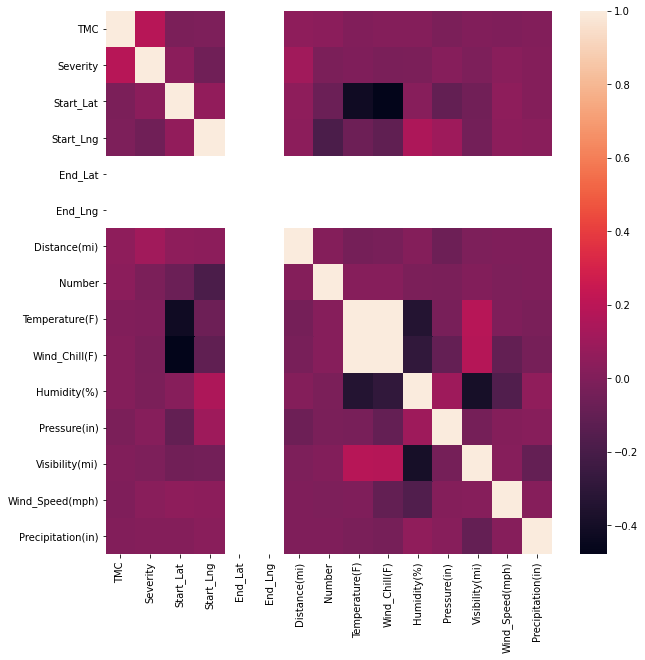

In [54]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Many of the strong correlations in this matrix have to do with the general weather conditions, so not things that I'm extemely interested in if I'm looking to predict severity. For example, temperatrue and wind chill seem to be correlated with visibility, but that doesn't give me strong information about the severity of an accident based on the visibility at the scene.

This means that I'm probably going to have to lean more on non-numeric columns which I will process in the future. I'm not going to eliminate features with low correlation off the bat - I'm going to let models such as PCA which columns are important for me.

Off the top of my head, I'd like to take a look at:
- Processing the start and end time columns from datetime objects into a single numerical column which represents the duration of the accident
- Creating a one hot encoding from the weather_condition column
- Turning the boolean columns into numerical ones by changing Trues to 1's and Falses to 0's
- Dropping location specific data (latitude and longitude)
- Processing the description and street data into a set of tokens

### Description

I'm interested in determining which of the columns are the best predictors of the accident severity (the impact of the accident on traffic conditions). I'm first going to take a look at the description and see if there is any language that is used frequently with high-severity accidents.

In [0]:
data_description = data[['Severity', 'Description']]

In [33]:
data_description.head(10)

,Severity,Description
0,3,Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.
1,2,Accident on Brice Rd at Tussing Rd. Expect delays.
2,2,Accident on OH-32 State Route 32 Westbound at Dela Palma Rd. Expect delays.
3,3,Accident on I-75 Southbound at Exits 52 52B US-35. Expect delays.
4,2,Accident on McEwen Rd at OH-725 Miamisburg Centerville Rd. Expect delays.
5,3,Accident on I-270 Outerbelt Northbound near Exit 29 OH-3 State St. Expect delays.
6,2,Accident on Oakridge Dr at Woodward Ave. Expect delays.
7,3,Accident on I-75 Southbound at Exit 54B Grand Ave. Expect delays.
8,2,Accident on Notre Dame Ave at Warner Ave. Expect delays.
9,3,Right hand shoulder blocked due to accident on I-270 Outerbelt Westbound at Exit 29 OH-3 State St.


I'm going to take a look at the descriptions for the most severe accidents and the least severe accidents and see if there is any language that I see frequently in either of the groups.

In [34]:
data_description[data_description['Severity'] == 1].head(10)

,Severity,Description
163,1,Accident on Westlawn Dr at Holly Dr.
374,1,Accident on North Ave at Old Byesville Rd.
960,1,Accident on Banta Rd at Brichetto Rd.
1390,1,Accident on Union Rd near Access Rd.
7851,1,Accident on CA-49 Southbound near CA-16.
8643,1,Accident on Valencia St Westbound at 24th St.
12420,1,Accident on Generations Ct in Manteca.
12780,1,Accident on CA-12 Jameson Canyon Rd Westbound before Kirkland Ranch Rd.
13035,1,Accident on Soquel Ave Westbound at Park Way.
13036,1,Accident on Wayland St in San Francisco.


In [35]:
data_description[data_description['Severity'] == 4].head(10)

,Severity,Description
619,4,Entry ramp closed due to accident on OH-104 Frank Rd Northbound at I-71.
1197,4,Accident on I-280 Southbound at Exits 3A 3B Bird Ave.
1901,4,Accident on I-280 Southbound before Exits 43A 43B I-380. On the median.
4143,4,Right lane blocked and queueing traffic due to accident on I-680 Southbound before Exit 1A US-101. On the median.
4964,4,All lane blocked due to accident on I-880 Southbound at Marina Blvd.
5108,4,Middle lane blocked due to accident on County Hwy-G12 Salinas Rd Northbound at Fremont St.
14035,4,Accident on I-580 Westbound at Exit 57 Greenville Rd.
16805,4,Right hand shoulder blocked due to accident on I-80 Westbound at Exits 44 44B Oliver Rd.
19411,4,Right hand shoulder blocked due to accident on I-580 Westbound at Exits 44B 45 I-680.
23259,4,Accident on I-80 Westbound at Exit 96 Madison Ave.


It looks like the most severe accidents seem to happen on large interstates. Some keywords to look out for here which might be predictive of accident severity are Northbound, Westbound, etc. On the other hand, it seems that less severe accidents seem to get sligtly shorter descriptions and tend to happen on streets and drives as opposed to interstates. All stuff to look out for going forward! I'm going to do more exploring.

When processing the data, I'd like to take a look at:
- Tokenizing and reducing to find the most important keywords
  - Ones to look out for: blocked, Westbound, Exit, St, Ct
- Calculating the length of the description

**I'm going to do some initial processing and come back for some more exploration! Check that out in the processing notebook.**
